In [13]:
include("../../src/utilities.jl")
include("../../src/model_with_ribosomes_functions.jl")
using Catalyst, DifferentialEquations, Plots

In [9]:
model = @reaction_network begin
    alpha,  0--> m
    gamma,  m-->0
end alpha gamma

Model ##ReactionSystem#260 with 2 equations
States (1):
  m(t)
Parameters (2):
  alpha
  gamma

First simulate only mRNA reactions until getting reasonable results.

In [27]:
p = (2.0, 0.1)
prob = DiscreteProblem(model, [round(ModelWithRibosomes.mrna(2.0, 0.1, 27.5, 0))], (0.0,27.5), p)

DiscreteProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 27.5)
u0: 1-element Vector{Float64}:
 10.0

In [28]:
jump_prob = JumpProblem(model, prob, Direct())


Number of constant rate jumps: 0
Number of variable rate jumps: 0
Have a mass action jump


In [29]:
sol = solve(jump_prob, SSAStepper())

retcode: Default
Interpolation: Piecewise constant interpolation
t: 113-element Vector{Float64}:
  0.0
  0.09004292001814652
  0.20968094875138077
  0.39484373850355087
  0.9376140962461945
  0.9686973528624454
  1.7519093150922487
  2.7267852214768156
  2.7864116056544965
  2.868711577180153
  3.1060120533853603
  3.310462244954188
  3.320149341989445
  ⋮
 26.12004536317377
 26.258082258828402
 26.32939959270188
 26.553169244023696
 26.562828465306794
 26.657358873638184
 26.806491008351053
 27.05313634105881
 27.180950236687245
 27.356727509093922
 27.359104263200933
 27.5
u: 113-element Vector{Vector{Float64}}:
 [10.0]
 [9.0]
 [8.0]
 [9.0]
 [8.0]
 [9.0]
 [8.0]
 [9.0]
 [10.0]
 [11.0]
 [12.0]
 [11.0]
 [12.0]
 ⋮
 [27.0]
 [28.0]
 [27.0]
 [28.0]
 [29.0]
 [30.0]
 [29.0]
 [28.0]
 [27.0]
 [26.0]
 [27.0]
 [27.0]

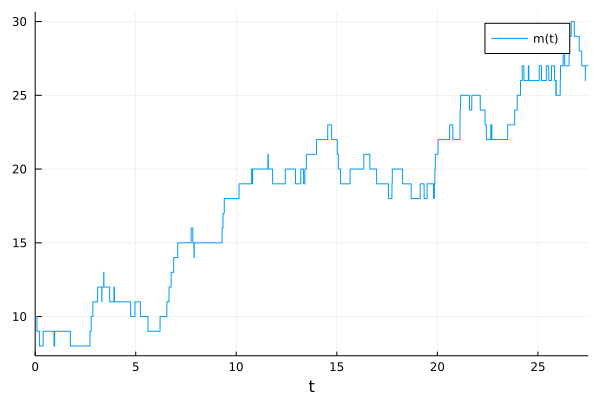

In [30]:
using Plots; plot(sol)

In [37]:
last(sol.u)

1-element Vector{Float64}:
 27.0

In [100]:
function simulate_cycle(model, alpha, gamma, t0, T, m0)
    p = (alpha, gamma)
    prob = DiscreteProblem(model, [m0], (t0,t0 + T), p)
    jump_prob = JumpProblem(model, prob, Direct())
    sol = solve(jump_prob, SSAStepper())
    return sol
end

simulate_cycle (generic function with 2 methods)

In [116]:
sol = simulate_cycle(model, 2.0, 0.1, 0.0, 27.5, 10)
t = 27.5
plot(sol, legend=false, color=:magenta)
for i in 1:20
    m0 = Utilities.partition_species(last(sol.u))
    sol = simulate_cycle(model, 2.0, 0.1, i*27.5, 27.5, 10)
    plot!(sol, color=:magenta)
    
end
plot!(sol, xaxis=[0, 27.5*21], color=:magenta)

In [121]:
sol.t

77-element Vector{Float64}:
 550.0
 550.1645905363067
 550.5433464887193
 550.9850942279799
 551.5770958833643
 552.4233417978185
 552.4318002665539
 552.8676123242101
 553.0204853359801
 553.355450301656
 553.5576658062217
 554.5726500070721
 554.786194198643
   ⋮
 573.8276306815349
 573.8958207294821
 574.0628209882099
 574.2646015129172
 574.7864367638526
 574.7865511321679
 574.9492900447483
 575.6164596408969
 576.0759086911235
 576.2319513683142
 576.3421380605093
 577.5